In [2]:
import sys
sys.path.insert(0,'/DATA/User/zuolulu/00.app/spateo-release')
import spateo as st
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import anndata as ad
import pickle
sys.path.insert(0,'/DATA/User/zuolulu/00.app/dynamo-release')
import dynamo as dyn

|-----> setting visualization default mode in dynamo. Your customized matplotlib settings might be overritten.


/home/zuolulu/miniconda3/envs/spateo/lib/python3.8/site-packages/nxviz-0.7.3-py3.8.egg/nxviz/__init__.py:18: UserWarning:


nxviz has a new API! Version 0.7.3 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.3, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)




In [3]:
f = open("/home/panhailin/project/mouse_embryo/new/E16.5_E1S3/02.limb1/limb1_cluster_deg_anno.pkl", 'rb')
adata = pickle.load(f)
adata

AnnData object with n_obs × n_vars = 9022 × 11794
    obs: 'area', 'nGenes', 'nCounts', 'pMito', 'pass_basic_filter', 'Size_Factor', 'initial_cell_size', 'louvain', 'group_anno'
    var: 'nCells', 'nCounts', 'pass_basic_filter'
    uns: '__type', 'spatial', 'pp', 'neighbors', 'louvain', 'louvain_colors', 'umap_fit', 'cluster_markers', 'dendrogram_louvain', 'group_anno_colors'
    obsm: 'bbox', 'contour', 'spatial', 'pearson_residuals', 'X_pca', 'X_spatial', 'X_umap'
    layers: 'spliced', 'unspliced', 'raw', 'norm_log1p'
    obsp: 'distances', 'connectivities'

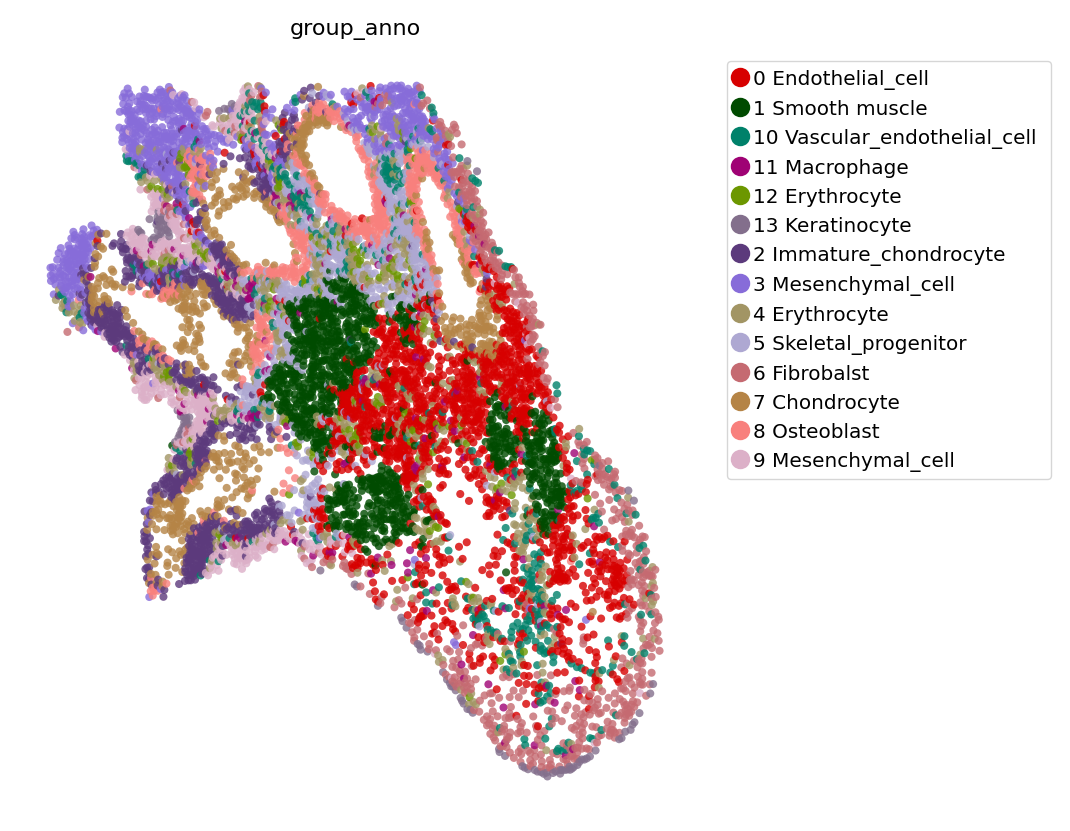

In [4]:
st.pl.space(adata,
            color=['group_anno'],
            pointsize=0.2,
            color_key=adata.uns['group_anno_colors'],
            show_legend='upper left',
            figsize=(5, 5))

### 'M_s'

In [5]:
weights_graph, distance_graph, adata = st.tl.weighted_spatial_graph(
    adata,
    n_neighbors=30,
)

|-----> <insert> spatial_connectivities to obsp in AnnData Object.
|-----> <insert> spatial_distances to obsp in AnnData Object.
|-----> <insert> spatial_neighbors to uns in AnnData Object.
|-----> <insert> spatial_neighbors.indices to uns in AnnData Object.
|-----> <insert> spatial_neighbors.params to uns in AnnData Object.
|-----> <insert> spatial_weights to obsp in AnnData Object.


In [6]:
dyn.pp.recipe_monocle(adata)

|-----> recipe_monocle_keep_filtered_cells_key is None. Using default value from DynamoAdataConfig: recipe_monocle_keep_filtered_cells_key=True
|-----> recipe_monocle_keep_filtered_genes_key is None. Using default value from DynamoAdataConfig: recipe_monocle_keep_filtered_genes_key=True
|-----> recipe_monocle_keep_raw_layers_key is None. Using default value from DynamoAdataConfig: recipe_monocle_keep_raw_layers_key=True
|-----> apply Monocole recipe to adata...
|-----> <insert> pp to uns in AnnData Object.
|-----------> <insert> has_splicing to uns['pp'] in AnnData Object.
|-----------> <insert> has_labling to uns['pp'] in AnnData Object.
|-----------> <insert> splicing_labeling to uns['pp'] in AnnData Object.
|-----------> <insert> has_protein to uns['pp'] in AnnData Object.
|-----> ensure all cell and variable names unique.
|-----> ensure all data in different layers in csr sparse matrix format.
|-----> ensure all labeling data properly collapased
|-----------> <insert> tkey to uns['

In [7]:
adata2 = adata.copy()
del adata2.layers['raw']
del adata2.layers['norm_log1p']
del adata2.layers['X_raw']
del adata2.layers['X_norm_log1p']

In [8]:
dyn.tl.moments(adata2)

|-----> calculating first/second moments...
|-----> [moments calculation] in progress: 100.0000%
|-----> [moments calculation] finished [39.9155s]


In [9]:
sender_ct = '3 Mesenchymal_cell'
receptor_ct = '2 Immature_chondrocyte'

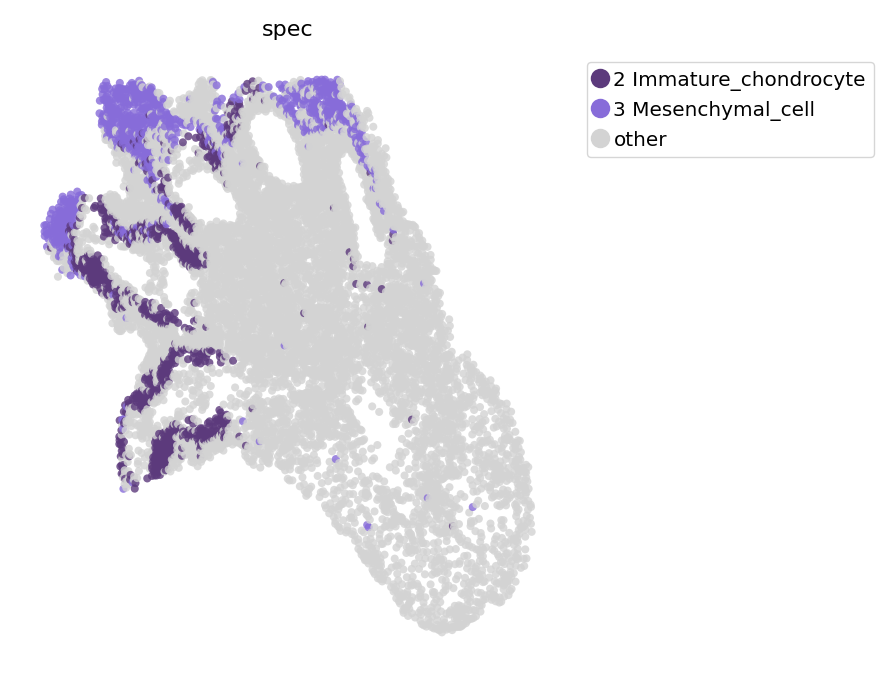

In [10]:
st.tl.prepare_cci_cellpair_adata(adata2, sender_group=sender_ct,
                                 receiver_group=receptor_ct, group='group_anno', all_cell_pair=True)
# plot all cell pair
st.pl.space(adata2,
            color=['spec'],
            pointsize=0.2,
            color_key={'other': '#D3D3D3', sender_ct: adata.uns['group_anno_colors']
                       [sender_ct], receptor_ct: adata.uns['group_anno_colors'][receptor_ct]},
            show_legend='upper left',
            figsize=(4, 4),
            save_show_or_return='show',
            #save_kwargs={"prefix": "./figures/left_2DPI_uninjury_cci_" + sender_ct + "_" + receptor_ct + "_all_cell_pair"}
            )

In [12]:
res = st.tl.find_cci_two_group(adata2,
                               path='/DATA/User/zuolulu/00.app/spateo-release/spateo/tools/database/',
                               species='mouse',
                               group='group_anno',
                               sender_group=sender_ct,
                               receiver_group=receptor_ct,
                               filter_lr='outer',
                               mode='mode2',
                               min_pairs=0,
                               min_pairs_ratio=0,
                               layer='M_s',
                               pvalue = 0.01,
                               top=20,
                               fdr=False,)

/DATA/User/zuolulu/00.app/spateo-release/spateo/tools/cci_two_cluster.py:178: RuntimeWarning:

invalid value encountered in true_divide

/DATA/User/zuolulu/00.app/spateo-release/spateo/tools/cci_two_cluster.py:179: ImplicitModificationWarning:

Trying to modify attribute `.var` of view, initializing view as actual.



|-----> 20 ligands for cell type 3 Mesenchymal_cell_prox with highest fraction of prevalence: ['a', 'Cdh12', 'Nrg3', 'Wnt9a', 'Ngf', 'Pcdh9', 'Lrrc4c', 'Dkk1', 'Gdf5', 'Negr1', 'Bmp3', 'Bmp2', 'Il2', 'Sst', 'Cntn1', 'Fgf12', 'Nlgn3', 'Rspo3', 'Rspo2', 'Ntn1']. Testing interactions involving these genes.


/DATA/User/zuolulu/00.app/spateo-release/spateo/tools/cci_two_cluster.py:178: RuntimeWarning:

invalid value encountered in true_divide

/DATA/User/zuolulu/00.app/spateo-release/spateo/tools/cci_two_cluster.py:203: ImplicitModificationWarning:

Trying to modify attribute `.var` of view, initializing view as actual.



|-----> 20 receptors for cell type 2 Immature_chondrocyte_prox with highest fraction of prevalence: ['Negr1', 'Htr1f', 'Ptpro', 'Cntnap2', 'Gabra1', 'Cdh10', 'Ar', 'Tnfrsf10b', 'Stra6', 'Cd46', 'Met', 'Itgb8', 'Pgr', 'Gabrb3', 'Lrrc4c', 'Gria2', 'Grm8', 'Epha6', 'Gabrb2', 'Plxna4']. Testing interactions involving these genes.


100%|██████████| 1000/1000 [01:34<00:00, 10.53it/s]


In [14]:
res['cell_pair']

,cell_pair_name,cell_sender,cell_receiver
27,2>-<22,2,22
45,4>-<22,4,22
77,5>-<22,5,22
136,8>-<22,8,22
172,9>-<22,9,22
...,...,...,...
206521,8869>-<8837,8869,8837
208783,8963>-<8837,8963,8837
208811,8964>-<8837,8964,8837
220233,9443>-<9433,9443,9433


(None, [<Axes: title={'center': 'spec'}>])

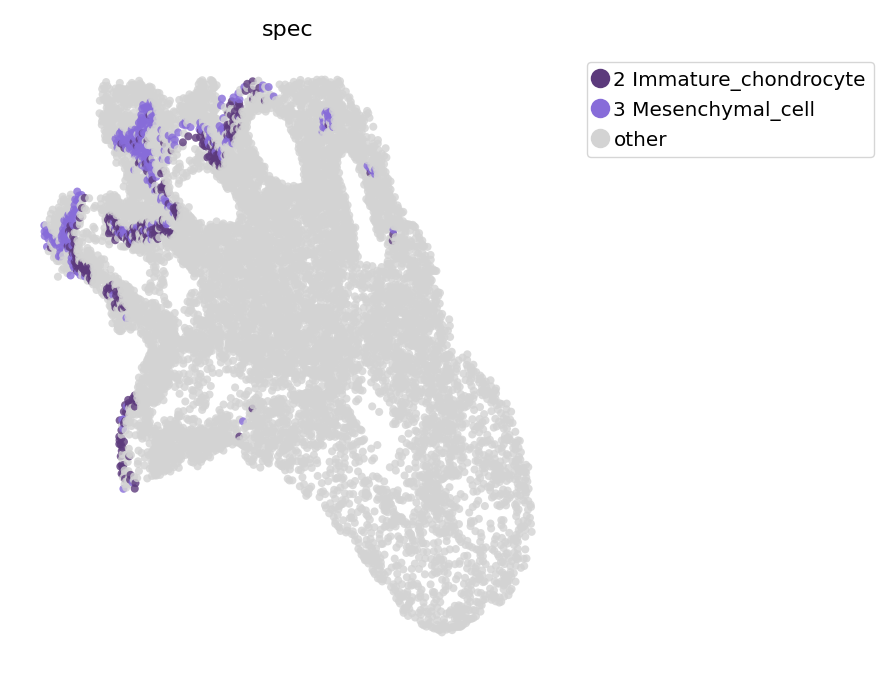

In [15]:
st.tl.prepare_cci_cellpair_adata(
    adata2, sender_group=sender_ct, receiver_group=receptor_ct, cci_dict=res, all_cell_pair=False)
# plot
st.pl.space(adata2,
            color=['spec'],
            pointsize=0.2,
            color_key={'other': '#D3D3D3', sender_ct: adata.uns['group_anno_colors']
                       [sender_ct], receptor_ct: adata.uns['group_anno_colors'][receptor_ct]},
            show_legend='upper left',
            figsize=(4, 4),
            save_show_or_return='return',
            #save_kwargs={"prefix": "./figures/left_2DPI_uninjury_cci_" + sender_ct + "_" + receptor_ct + "_cell_pair"}
            )

In [16]:
df = res['lr_pair']
df = df.loc[df['lr_co_exp_num'] > 0].sort_values(
    'lr_co_exp_ratio', ascending=False)[0:20]
df = df.drop_duplicates('lr_pair')

In [17]:
df

,from,to,source,database,lr_pair,lr_product,lr_co_exp_num,lr_co_exp_ratio,lr_co_exp_ratio_pvalue,is_significant,sr_pair
1644,Rspo3,Lgr4,ramilowski_known,ramilowski,Rspo3-Lgr4,0.005506,1123,0.758271,0.0,True,3 Mesenchymal_cell-2 Immature_chondrocyte
1252,Gdf5,Bmpr2,ramilowski_known,ramilowski,Gdf5-Bmpr2,0.006902,1102,0.744092,0.0,True,3 Mesenchymal_cell-2 Immature_chondrocyte
177,Gdf5,Bmpr1a,kegg_cytokines,kegg,Gdf5-Bmpr1a,0.005938,1066,0.719784,0.0,True,3 Mesenchymal_cell-2 Immature_chondrocyte
838,Bmp3,Bmpr2,ramilowski_known,ramilowski,Bmp3-Bmpr2,0.004648,995,0.671843,0.0,True,3 Mesenchymal_cell-2 Immature_chondrocyte
836,Bmp3,Bmpr1a,ramilowski_known,ramilowski,Bmp3-Bmpr1a,0.003947,959,0.647535,0.0,True,3 Mesenchymal_cell-2 Immature_chondrocyte
11866,Pcdh9,Ryk,ppi_bidir_r_go,ppi_prediction_go,Pcdh9-Ryk,0.003434,875,0.590817,0.0,True,3 Mesenchymal_cell-2 Immature_chondrocyte
11770,Ptprf,Gria2,ppi_bidir_r_go,ppi_prediction_go,Ptprf-Gria2,0.003178,829,0.559757,0.0,True,3 Mesenchymal_cell-2 Immature_chondrocyte
1157,Fgf12,Fgfr1,ramilowski_known,ramilowski,Fgf12-Fgfr1,0.003492,817,0.551654,0.0,True,3 Mesenchymal_cell-2 Immature_chondrocyte
7312,Sst,Agtr2,ppi_lr,ppi_prediction,Sst-Agtr2,0.002863,807,0.544902,0.0,True,3 Mesenchymal_cell-2 Immature_chondrocyte
5571,Sst,Lpar1,ppi_lr,ppi_prediction,Sst-Lpar1,0.002365,783,0.528697,0.0,True,3 Mesenchymal_cell-2 Immature_chondrocyte


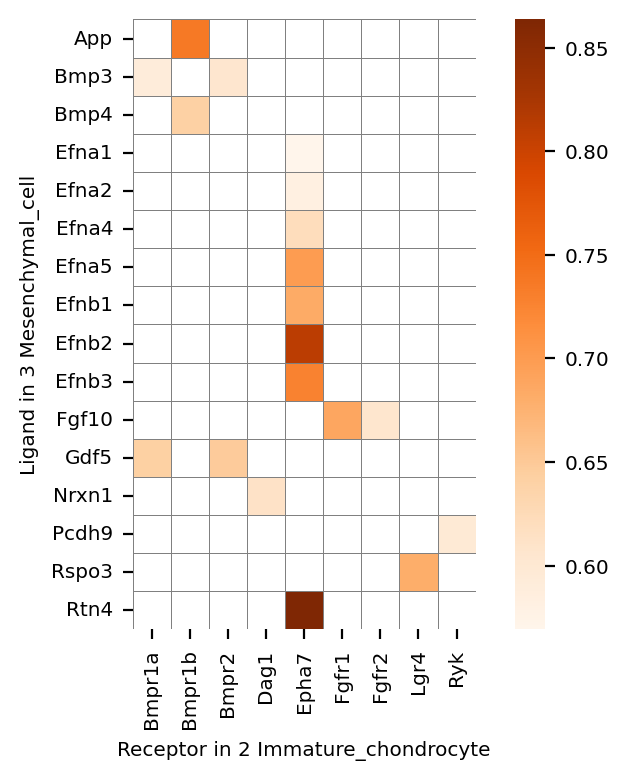

In [14]:
data1=(df.iloc[:,[0,1,7]]).drop_duplicates()
test=data1.pivot(index="from", columns="to", values="lr_co_exp_ratio").fillna(0)
fig = plt.figure()
fig.set_size_inches(5,5)
x_label=list(test.columns.tolist())
y_label=list(test.index)
sns.heatmap(test,cmap="Oranges",square=True,
            yticklabels=y_label,linecolor='grey',linewidths=0.3,
            annot_kws={'size':9,'weight':'bold',},
            xticklabels=x_label,mask=(test<0.01))
plt.gcf().subplots_adjust(bottom=0.3)
plt.xlabel("Receptor in 2 Immature_chondrocyte")
plt.ylabel("Ligand in 3 Mesenchymal_cell")
plt.rcParams['pdf.fonttype'] = 42
#plt.savefig("3_2_cci_heatmap.pdf")

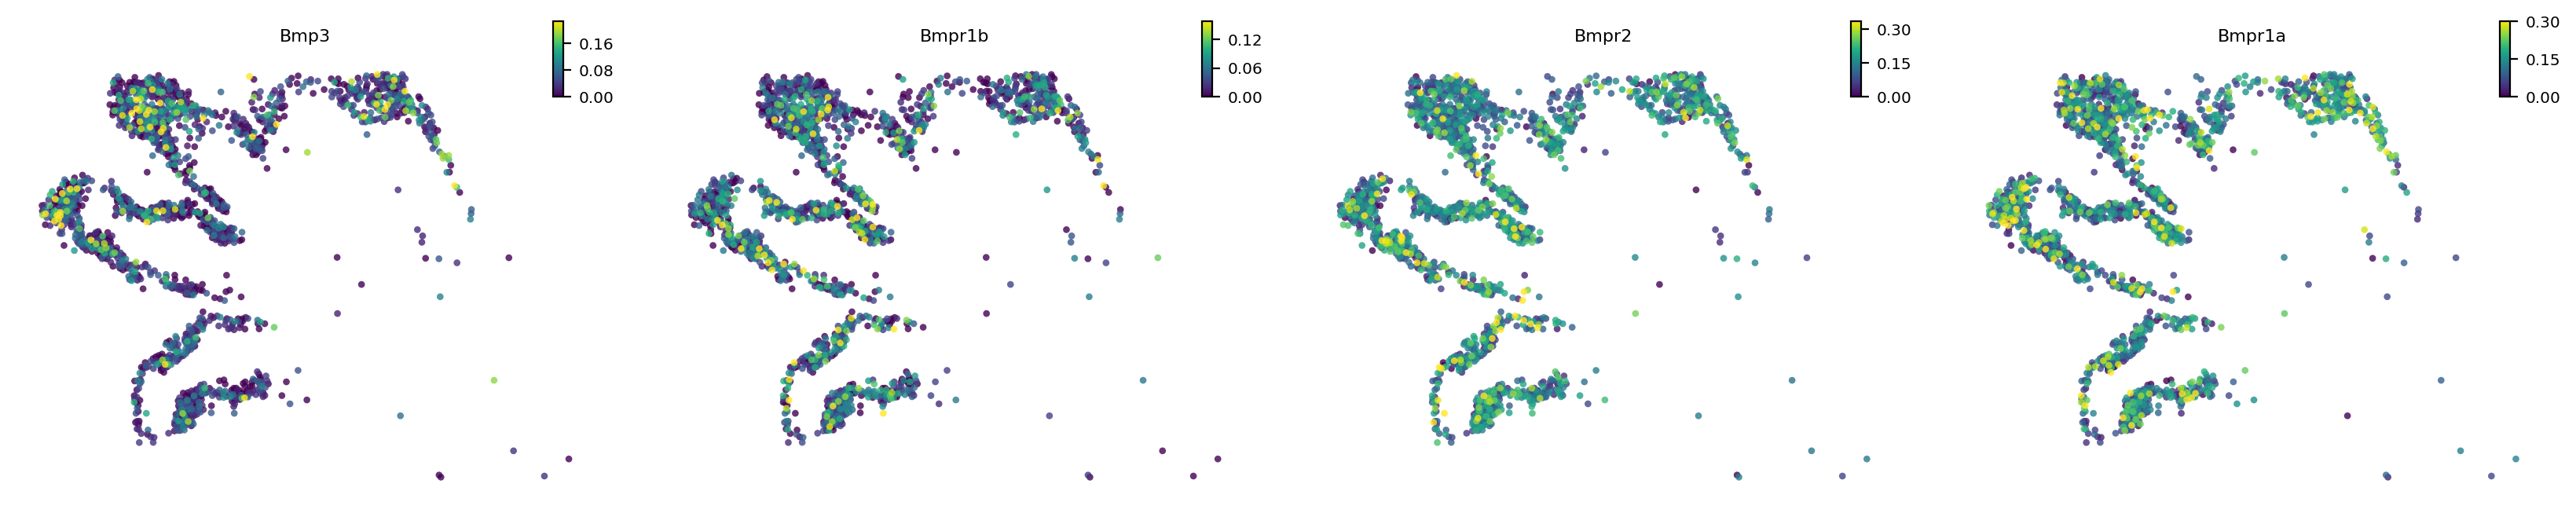

In [15]:
sub = adata2[np.isin(adata.obs['group_anno'], [sender_ct, receptor_ct])]
st.pl.space(sub,color=['Bmp3','Bmpr1b', 'Bmpr2', 'Bmpr1a'], pointsize=0.1,
            show_legend='upper left', layer='M_s')